In [525]:
import pandas as pd
import numpy as np

import seaborn as sns
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")


In [526]:

# Load the first sheet (Sheet1) into a DataFrame
df = pd.read_excel("/content/side_effect_data.xlsx", sheet_name='Sheet1')

# Display the first few rows of the dataset to understand its structure
df

,Kullanici_id,Cinsiyet,Dogum_Tarihi,Uyruk,Il,Ilac_Adi,Ilac_Baslangic_Tarihi,Ilac_Bitis_Tarihi,Yan_Etki,Yan_Etki_Bildirim_Tarihi,Alerjilerim,Kronik Hastaliklarim,Baba Kronik Hastaliklari,Anne Kronik Hastaliklari,Kiz Kardes Kronik Hastaliklari,Erkek Kardes Kronik Hastaliklari,Kan Grubu,Kilo,Boy
0,107,Male,1960-03-01,Turkiye,Canakkale,trifluoperazine,2022-01-09,2022-03-04,Kabizlik,2022-02-19 18:28:43,Ceviz,"Hipertansiyon, Kan Hastaliklari","Guatr, Hipertansiyon",KOAH,"Kemik Erimesi, Kalp Hastaliklari","Kemik Erimesi, Guatr",B RH-,103.0,191.0
1,140,Male,1939-10-12,Turkiye,Trabzon,fluphenazine hcl,2022-01-09,2022-03-08,Yorgunluk,2022-02-03 20:48:17,Toz,NaN,"Guatr, Diger","Hipertansiyon, Kalp Hastaliklari",,"KOAH, Diyabet",NaN,81.0,181.0
2,2,Female,1976-12-17,Turkiye,Canakkale,warfarin sodium,2022-01-11,2022-03-12,Carpinti,2022-02-04 05:29:20,Muz,"Kalp Hastaliklari, Diyabet","Diyabet, KOAH","Kemik Erimesi, Diyabet","Diyabet, Kemik Erimesi",Diger,B RH-,93.0,158.0
3,83,Male,1977-06-17,Turkiye,Adana,valproic acid,2022-01-04,2022-03-12,Sinirlilik,2022-02-08 01:01:21,Pancar,"Diyabet, Diger","Kalp Hastaliklari, Diger",NaN,Astim,"Kalp Hastaliklari, Kanser",AB RH-,NaN,165.0
4,7,Female,1976-09-03,Turkiye,Izmir,carbamazepine extended release,2022-01-13,2022-03-06,Agizda Farkli Bir Tat,2022-02-12 05:33:06,NaN,"Diyabet, Kalp Hastaliklari","Alzheimer, Hipertansiyon","Kan Hastaliklari, Kemik Erimesi","Diyabet, Diger","Alzheimer, Hipertansiyon",AB RH-,99.0,172.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2352,9,NaN,1957-01-04,Turkiye,NaN,"desoximetasone spray, non-aerosol",2022-01-13,2022-03-04,Ishal,2022-02-12 19:13:43,Ispanakgiller,NaN,,"Astim, Guatr",,"KOAH, Kan Hastaliklari",NaN,50.0,152.0
2353,101,Female,2004-11-09,Turkiye,Mersin,olanzapine-fluoxetine,2022-01-02,2022-03-05,Agizda Farkli Bir Tat,2022-02-19 17:39:48,Istiridye,NaN,"Hipertansiyon, Astim","Astim, Kemik Erimesi","KOAH, Kan Hastaliklari","Astim, Diyabet",AB RH-,NaN,178.0
2354,127,Female,1951-11-29,Turkiye,Mersin,trazodone,2022-01-02,2022-03-12,Yorgunluk,2022-02-03 20:48:17,Deniz Urunler,"Guatr, KOAH","Alzheimer, Diger",NaN,"Astim, Diyabet","Kalp Hastaliklari, Diger",B RH+,90.0,203.0
2355,178,Male,1980-01-30,Turkiye,Kayseri,duloxetine hydrochloride,2022-01-02,2022-03-08,Carpinti,2022-02-04 05:29:20,Sari Kantaron,"Alzheimer, Diger",NaN,"Kalp Hastaliklari, Diger","Kanser, KOAH","Astim, KOAH",NaN,90.0,184.0


In [527]:
missing_values = df.isnull().sum()

# Display missing values sorted in descending order
missing_values[missing_values > 0].sort_values(ascending=False)

,0
Cinsiyet,778
Alerjilerim,484
Kronik Hastaliklarim,392
Kan Grubu,347
Kilo,293
Il,227
Anne Kronik Hastaliklari,217
Baba Kronik Hastaliklari,156
Erkek Kardes Kronik Hastaliklari,121
Boy,114


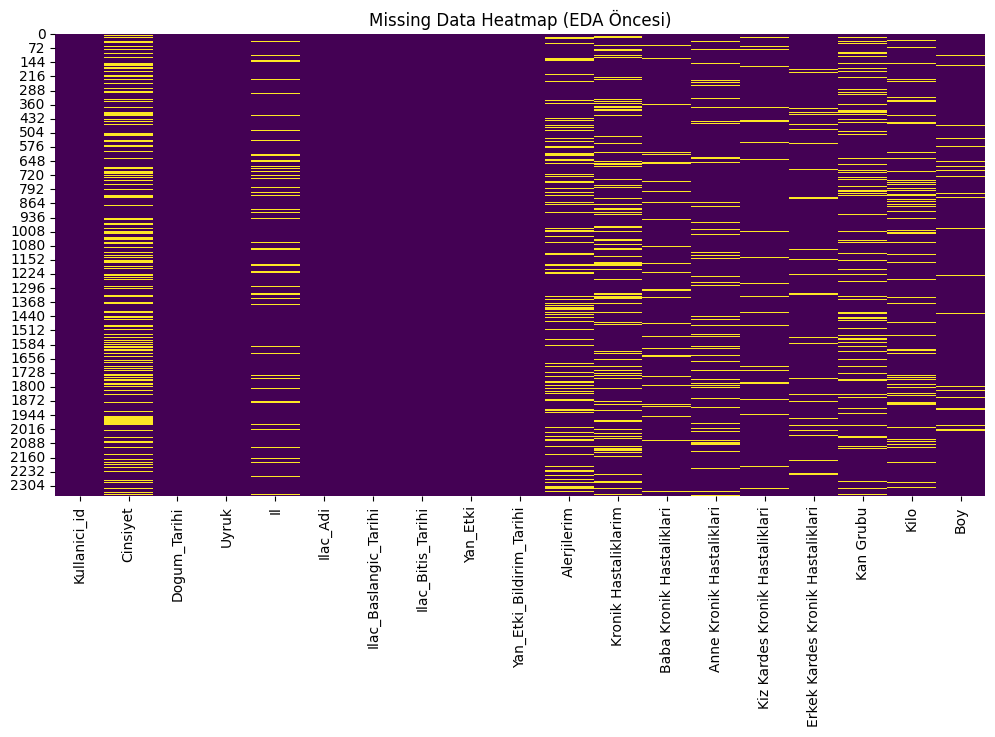

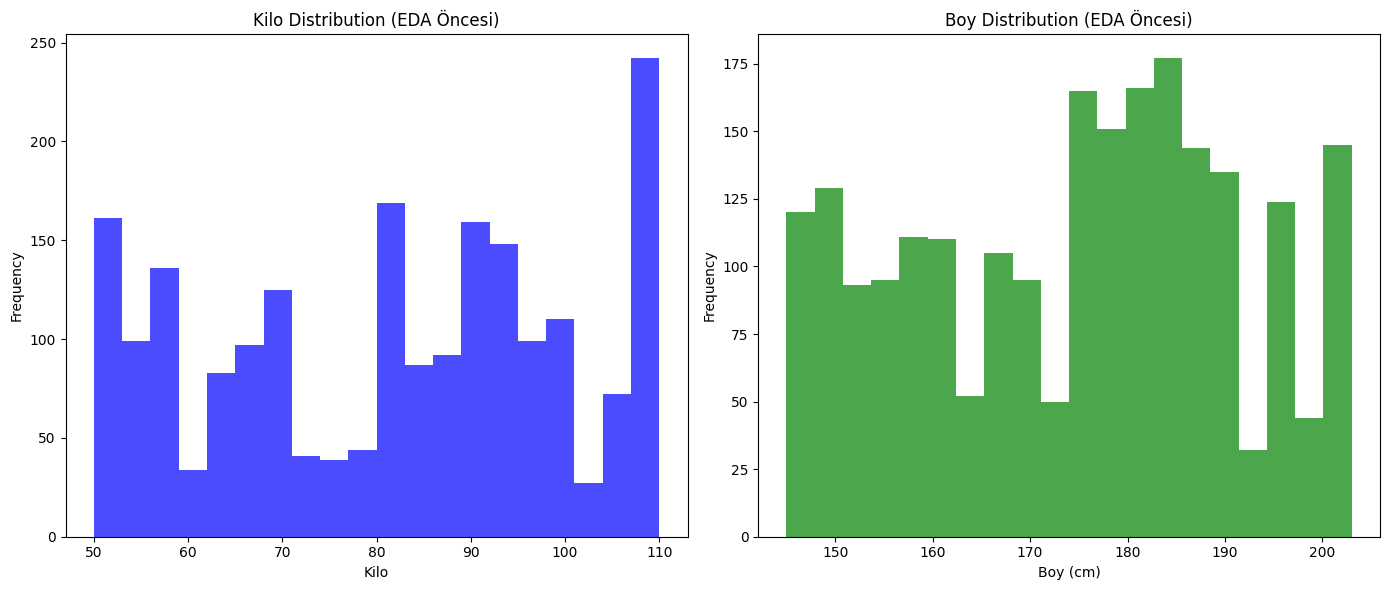

In [528]:


# Displaying missing values using a heatmap to visualize where the missing data is
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap (EDA Öncesi)')
plt.show()

# Plotting histograms for Kilo and Boy distributions (EDA Öncesi)
plt.figure(figsize=(14, 6))

# Kilo distribution
plt.subplot(1, 2, 1)
plt.hist(df['Kilo'].dropna(), bins=20, color='blue', alpha=0.7)
plt.title('Kilo Distribution (EDA Öncesi)')
plt.xlabel('Kilo')
plt.ylabel('Frequency')

# Boy distribution
plt.subplot(1, 2, 2)
plt.hist(df['Boy'].dropna(), bins=20, color='green', alpha=0.7)
plt.title('Boy Distribution (EDA Öncesi)')
plt.xlabel('Boy (cm)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [529]:
df_cleaned = df.copy()

In [530]:
from sklearn.impute import KNNImputer

# Replacing missing 'Cinsiyet' values with 'Bilinmeyen' and then encoding as 0
df_cleaned['Cinsiyet'].replace('Male', 1, inplace=True)
df_cleaned['Cinsiyet'].replace('Female', 2, inplace=True)
df_cleaned['Cinsiyet'].fillna('Bilinmeyen', inplace=True)
df_cleaned['Cinsiyet'].replace('Bilinmeyen', 0, inplace=True)
# Cinsiyet sütununu integer'a çevirme
df_cleaned['Cinsiyet'] = df_cleaned['Cinsiyet'].astype(int)

<ipython-input-530-3100db5b2356>:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Bilinmeyen' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_cleaned['Cinsiyet'].fillna('Bilinmeyen', inplace=True)


In [531]:
# Displaying the unique values from the 'Ilac_Adi' column
unique_drugs = df['Il'].unique()

# Showing the unique drug names
unique_drugs


array(['Canakkale', 'Trabzon', 'Adana', 'Izmir', nan, 'Mersin', 'Antalya',
       'Eskisehir', 'Samsun', 'Ankara', 'Bursa', 'Istanbul', 'Malatya',
       'Kayseri'], dtype=object)

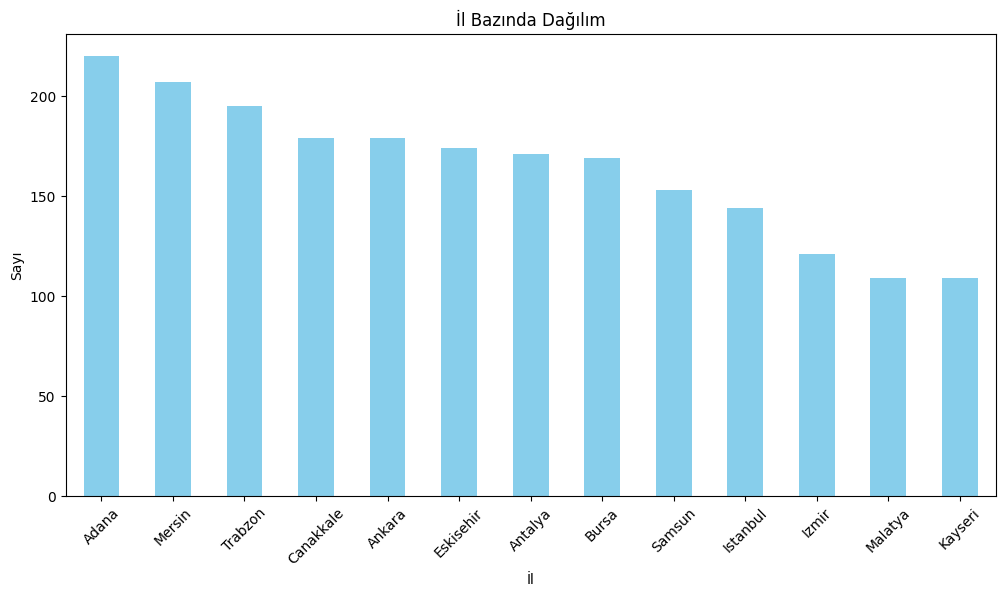

In [532]:
import matplotlib.pyplot as plt
import seaborn as sns

# İl bazında dağılım (bar graph ile)
plt.figure(figsize=(12, 6))
df_cleaned['Il'].value_counts().plot(kind='bar', color='skyblue')
plt.title('İl Bazında Dağılım')
plt.xlabel('İl')
plt.ylabel('Sayı')
plt.xticks(rotation=45)
plt.show()



In [533]:
# İllere göre yan etkilerin dağılımını gruplama
yan_etki_il = df_cleaned.groupby(['Il', 'Yan_Etki']).size().unstack(fill_value=0)

# Sonuçları görüntüleme
print(yan_etki_il.head())


Yan_Etki   Agizda Farkli Bir Tat  Az Uyuma  Bas Agrisi  Bulanti  Carpinti  \
Il                                                                          
Adana                         19         9           8        4         2   
Ankara                        12         3           6        6         6   
Antalya                       17         9           7        5         3   
Bursa                         15        15           4        6         5   
Canakkale                     22        12           6        3         5   

Yan_Etki   Deride Morarma  Gec Bosalma  Gormede Bulaniklik  Gucsuzluk  \
Il                                                                      
Adana                   3           10                  18         11   
Ankara                  3            7                  12          7   
Antalya                 5            3                  10         12   
Bursa                   2            9                  11          9   
Canakkale             

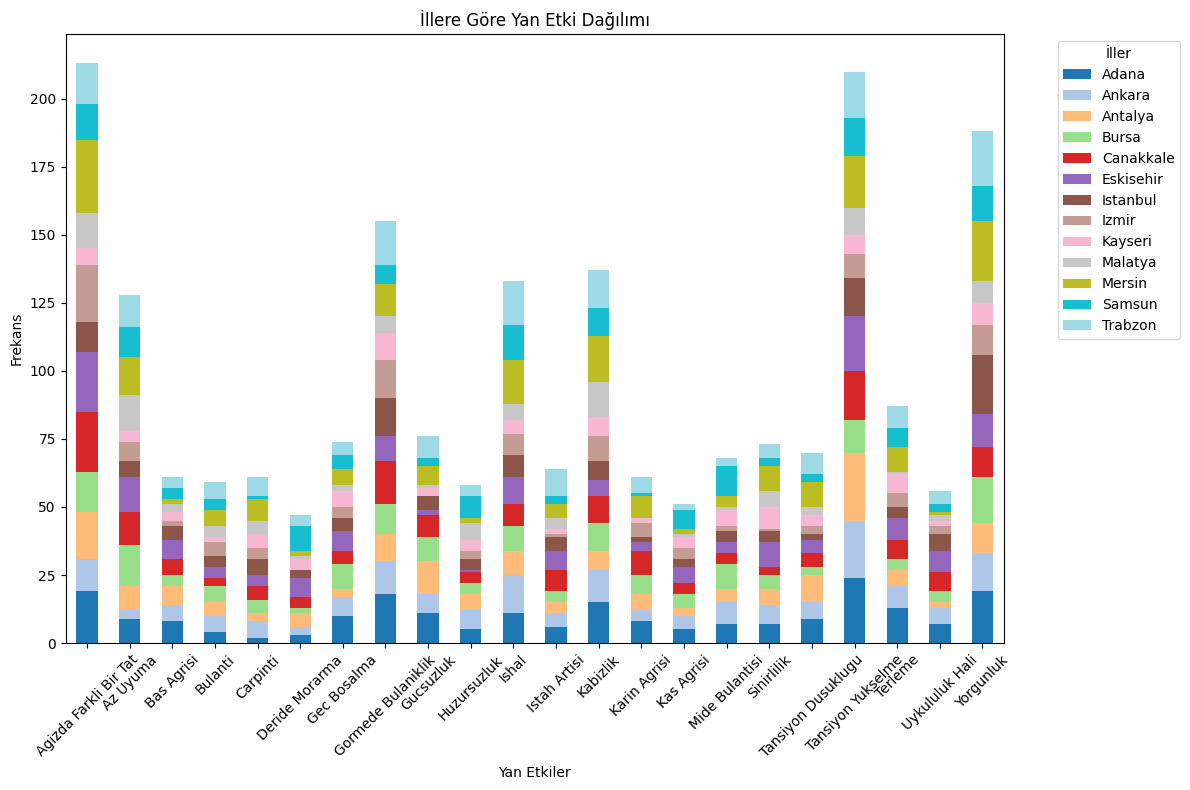

In [534]:
import matplotlib.pyplot as plt
import seaborn as sns

# İllere göre yan etki dağılımını gruplama
yan_etki_il = df_cleaned.groupby(['Il', 'Yan_Etki']).size().unstack(fill_value=0)

# Bar plot ile görselleştirme
yan_etki_il.T.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')
plt.title('İllere Göre Yan Etki Dağılımı')
plt.xlabel('Yan Etkiler')
plt.ylabel('Frekans')
plt.xticks(rotation=45)
plt.legend(title='İller', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


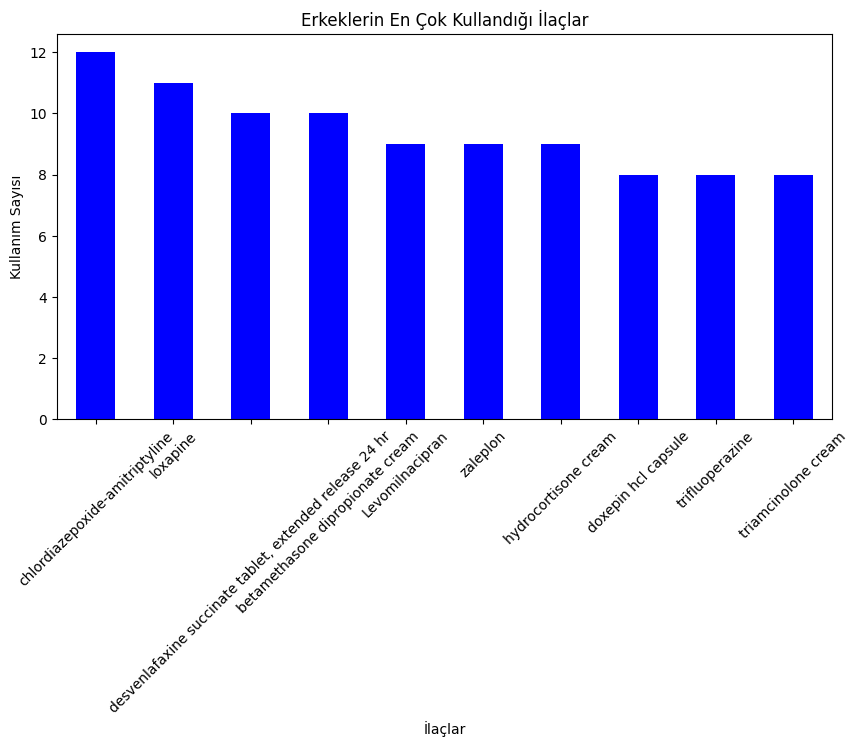

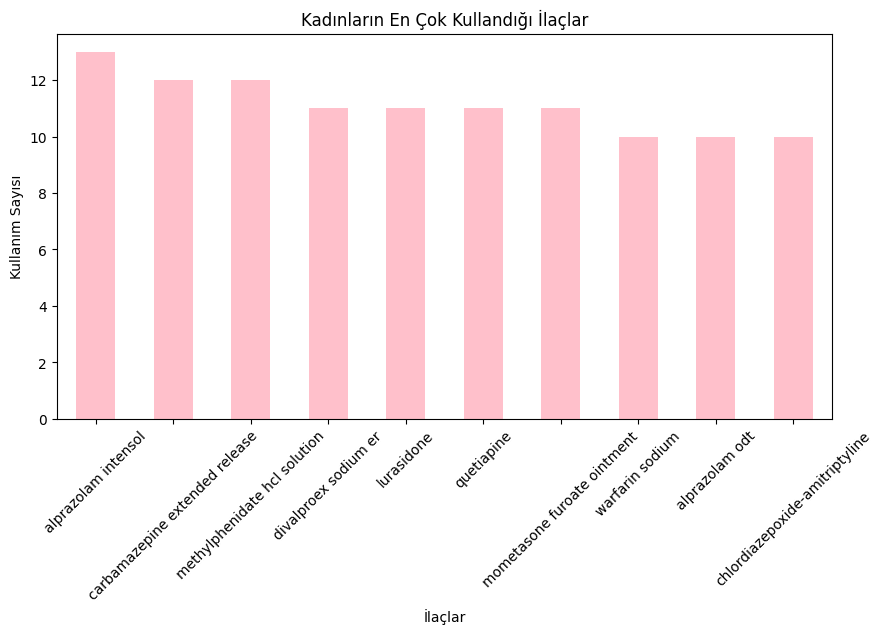

In [535]:
import matplotlib.pyplot as plt
import seaborn as sns
# Cinsiyet sütununu integer'a çevirme
df_cleaned['Cinsiyet'] = df_cleaned['Cinsiyet'].astype(int)

import matplotlib.pyplot as plt
import seaborn as sns

# Cinsiyete göre ilaç kullanımı gruplama
ilac_kullanimi_cinsiyet = df_cleaned.groupby(['Cinsiyet', 'Ilac_Adi']).size().unstack(fill_value=0)

# Erkeklerin ve kadınların en çok kullandığı ilaçları bulma
erkek_ilaclari = ilac_kullanimi_cinsiyet.loc[1].sort_values(ascending=False).head(10)  # 1 erkek
kadın_ilaclari = ilac_kullanimi_cinsiyet.loc[2].sort_values(ascending=False).head(10)  # 2 kadın

# Görselleştirme: Erkeklerin en çok kullandığı ilaçlar
plt.figure(figsize=(10, 5))
erkek_ilaclari.plot(kind='bar', color='blue')
plt.title('Erkeklerin En Çok Kullandığı İlaçlar')
plt.xlabel('İlaçlar')
plt.ylabel('Kullanım Sayısı')
plt.xticks(rotation=45)
plt.show()

# Görselleştirme: Kadınların en çok kullandığı ilaçlar
plt.figure(figsize=(10, 5))
kadın_ilaclari.plot(kind='bar', color='pink')
plt.title('Kadınların En Çok Kullandığı İlaçlar')
plt.xlabel('İlaçlar')
plt.ylabel('Kullanım Sayısı')
plt.xticks(rotation=45)
plt.show()



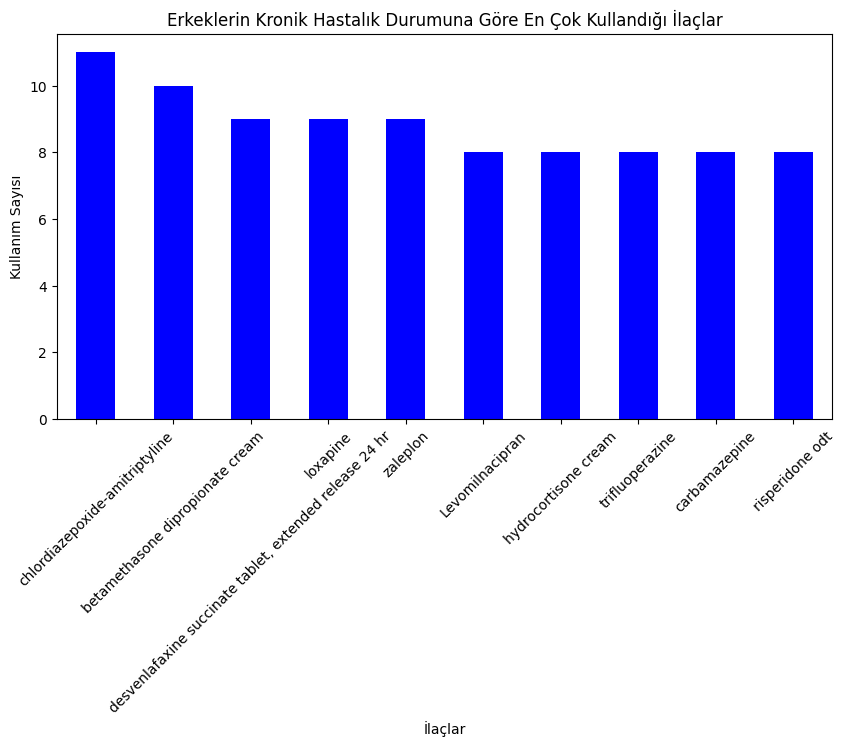

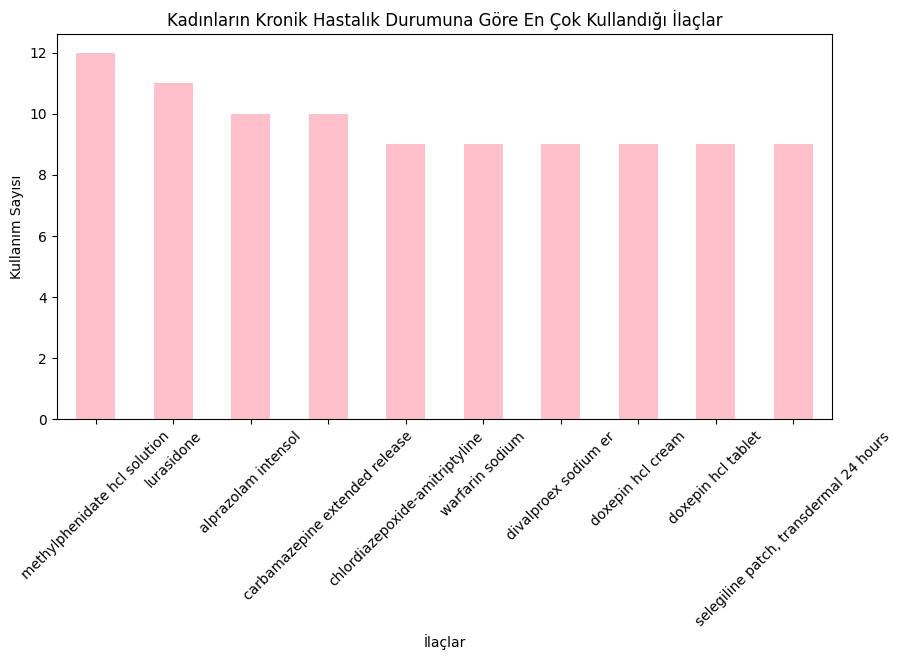

In [536]:
# Cinsiyet ve kronik hastalık durumuna göre ilaç kullanımı gruplama
ilac_kronik_cinsiyet = df_cleaned.groupby(['Cinsiyet', 'Kronik Hastaliklarim', 'Ilac_Adi']).size().unstack(fill_value=0)

# Erkekler ve kadınlar için en çok kullanılan ilaçlar
erkek_kronik_ilac = ilac_kronik_cinsiyet.loc[1].sum().sort_values(ascending=False).head(10)  # Erkekler
kadın_kronik_ilac = ilac_kronik_cinsiyet.loc[2].sum().sort_values(ascending=False).head(10)  # Kadınlar

# Görselleştirme: Erkeklerin kronik hastalık durumuna göre en çok kullandığı ilaçlar
plt.figure(figsize=(10, 5))
erkek_kronik_ilac.plot(kind='bar', color='blue')
plt.title('Erkeklerin Kronik Hastalık Durumuna Göre En Çok Kullandığı İlaçlar')
plt.xlabel('İlaçlar')
plt.ylabel('Kullanım Sayısı')
plt.xticks(rotation=45)
plt.show()

# Görselleştirme: Kadınların kronik hastalık durumuna göre en çok kullandığı ilaçlar
plt.figure(figsize=(10, 5))
kadın_kronik_ilac.plot(kind='bar', color='pink')
plt.title('Kadınların Kronik Hastalık Durumuna Göre En Çok Kullandığı İlaçlar')
plt.xlabel('İlaçlar')
plt.ylabel('Kullanım Sayısı')
plt.xticks(rotation=45)
plt.show()


In [537]:
import pandas as pd

# İllerin bölgelere göre gruplandırılması
bolgeler = {
    'Marmara': ['Bursa', 'Istanbul', 'Canakkale'],
    'Ege': ['Izmir'],
    'Akdeniz': ['Adana', 'Mersin', 'Antalya'],
    'İç Anadolu': ['Eskisehir', 'Ankara', 'Kayseri'],
    'Karadeniz': ['Trabzon', 'Samsun'],
    'Doğu Anadolu': ['Malatya']
}

# Fonksiyon: İlleri coğrafi bölgelere atayan fonksiyon
def il_to_bolge(il):
    if pd.isna(il):
        return 'Bilinmeyen'
    for bolge, iller in bolgeler.items():
        if il in iller:
            return bolge
    return 'Bilinmeyen'

# NaN değerlerini 'Bilinmeyen' ile doldurma ve illeri bölgelere göre atama
df_cleaned['Il'].fillna('Bilinmeyen', inplace=True)
df_cleaned['Bolge'] = df_cleaned['Il'].apply(il_to_bolge)

# One-Hot Encoding işlemi: Bolge sütunu için 0 ve 1 kullanarak
df_cleaned = pd.get_dummies(df_cleaned, columns=['Bolge'], drop_first=False)

# Aynı isimdeki sütunları kontrol etmek ve tekrarlanan sütunları temizlemek
df_cleaned = df_cleaned.loc[:, ~df_cleaned.columns.duplicated()]

# İlk 5 satırı görüntüleme (İl verilerinin One-Hot Encoding sonuçları)
df_cleaned[['Il'] + [col for col in df_cleaned.columns if 'Bolge_' in col]].head()


,Il,Bolge_Akdeniz,Bolge_Bilinmeyen,Bolge_Doğu Anadolu,Bolge_Ege,Bolge_Karadeniz,Bolge_Marmara,Bolge_İç Anadolu
0,Canakkale,False,False,False,False,False,True,False
1,Trabzon,False,False,False,False,True,False,False
2,Canakkale,False,False,False,False,False,True,False
3,Adana,True,False,False,False,False,False,False
4,Izmir,False,False,False,True,False,False,False


In [538]:
# Replacing missing values in categorical columns with 'None' or appropriate labels
df_cleaned['Kronik Hastaliklarim'].fillna('None', inplace=True)
df_cleaned['Alerjilerim'].fillna('None', inplace=True)
df_cleaned['Baba Kronik Hastaliklari'].fillna('None', inplace=True)
df_cleaned['Anne Kronik Hastaliklari'].fillna('None', inplace=True)
df_cleaned['Erkek Kardes Kronik Hastaliklari'].fillna('None', inplace=True)
df_cleaned['Kiz Kardes Kronik Hastaliklari'].fillna('None', inplace=True)



# For 'Kan Grubu', imputing with the mode since it's categorical
df_cleaned['Kan Grubu'].fillna(df['Kan Grubu'].mode()[0], inplace=True)

# Now, for all the columns where you want missing values to be treated as 0:
df_cleaned.replace({'None': 0}, inplace=True)


In [539]:



# Selecting only numeric columns for KNN imputation (Kilo, Boy, and potentially others)
numeric_cols = ['Kilo', 'Boy']

# Applying KNN Imputer with k=5 (default)
imputer = KNNImputer(n_neighbors=5)
df_cleaned[numeric_cols] = imputer.fit_transform(df_cleaned[numeric_cols])



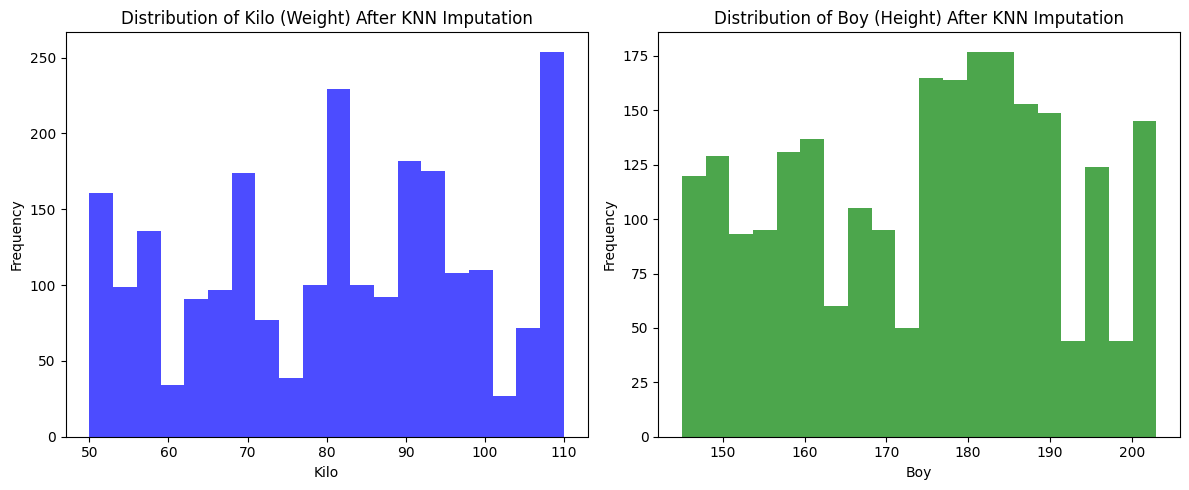

In [540]:
import matplotlib.pyplot as plt

# Plotting the distribution of Kilo (Weight) and Boy (Height) before and after KNN imputation
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plotting the distribution of Kilo (Weight)
axes[0].hist(df_cleaned['Kilo'], bins=20, color='blue', alpha=0.7)
axes[0].set_title('Distribution of Kilo (Weight) After KNN Imputation')
axes[0].set_xlabel('Kilo')
axes[0].set_ylabel('Frequency')

# Plotting the distribution of Boy (Height)
axes[1].hist(df_cleaned['Boy'], bins=20, color='green', alpha=0.7)
axes[1].set_title('Distribution of Boy (Height) After KNN Imputation')
axes[1].set_xlabel('Boy')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


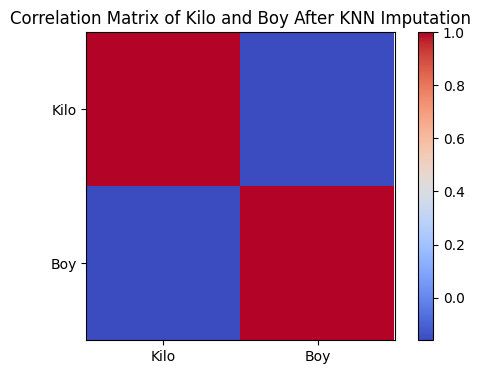

,Kilo,Boy
Kilo,1.000000,-0.161042
Boy,-0.161042,1.000000


In [541]:
# Re-importing the necessary libraries due to environment reset
import pandas as pd
import matplotlib.pyplot as plt

# Re-loading the cleaned dataset after environment reset
df_cleaned = pd.read_csv('cleaned_side_effects_data.csv')

# Calculating the correlation matrix for the relevant numeric columns
correlation_matrix = df_cleaned[['Kilo', 'Boy']].corr()

# Plotting a heatmap to visualize the correlation
plt.figure(figsize=(6, 4))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title("Correlation Matrix of Kilo and Boy After KNN Imputation")
plt.show()

# Displaying the correlation values
correlation_matrix


In [542]:
# First, let's define a function to group the values in relevant columns
def group_diseases(value):
    if pd.isna(value) or value == 0:
        return 'None'
    value = value.lower()
    if 'kalp' in value or 'hipertansiyon' in value:
        return 'Heart Disease'
    elif 'diyabet' in value:
        return 'Diabetes'
    elif 'koah' in value or 'solunum' in value:
        return 'Respiratory Disease'
    elif 'kanser' in value or 'kemik erimesi' in value:
        return 'Cancer/Bone Disease'
    else:
        return 'Other'

# Applying the disease grouping function to relevant columns
disease_columns = ['Kronik Hastaliklarim', 'Baba Kronik Hastaliklari',
                   'Anne Kronik Hastaliklari', 'Erkek Kardes Kronik Hastaliklari',
                   'Kiz Kardes Kronik Hastaliklari']

for col in disease_columns:
    df_cleaned[col] = df_cleaned[col].apply(group_diseases)

# Grouping 'Alerjilerim' column
def group_allergies(value):
    if pd.isna(value) or value == 0:
        return 'None'
    value = value.lower()
    if 'muz' in value or 'ceviz' in value:
        return 'Food Allergy'
    elif 'toz' in value or 'polen' in value:
        return 'Environmental Allergy'
    else:
        return 'Other Allergy'

df_cleaned['Alerjilerim'] = df_cleaned['Alerjilerim'].apply(group_allergies)

# Now, let's apply One-Hot Encoding to all categorical columns
df_encoded = pd.get_dummies(df_cleaned, columns=disease_columns + ['Alerjilerim'], drop_first=True)

In [543]:
# Replacing missing values in 'Kan Grubu' (Blood Type) with 'None'
df_cleaned['Kan Grubu'].fillna('None', inplace=True)

# Creating a mapping for the blood types, starting from 1, and setting 'None' as 0
blood_type_mapping = {'None': 0, 'A RH+': 1, 'A RH-': 2, 'B RH+': 3, 'B RH-': 4,
                      'AB RH+': 5, 'AB RH-': 6, '0 RH+': 7, '0 RH-': 8}

# Applying the mapping to the 'Kan Grubu' column
df_cleaned['Kan Grubu'] = df_cleaned['Kan Grubu'].map(blood_type_mapping)

# Now performing One-Hot Encoding on the 'Kan Grubu' column
df_encoded = pd.get_dummies(df_cleaned, columns=['Kan Grubu'], drop_first=False)



In [544]:
df_cleaned

,Kullanici_id,Cinsiyet,Dogum_Tarihi,Uyruk,Il,Ilac_Adi,Ilac_Baslangic_Tarihi,Ilac_Bitis_Tarihi,Yan_Etki,Yan_Etki_Bildirim_Tarihi,...,Kan Grubu,Kilo,Boy,Bolge_Akdeniz,Bolge_Bilinmeyen,Bolge_Doğu Anadolu,Bolge_Ege,Bolge_Karadeniz,Bolge_Marmara,Bolge_İç Anadolu
0,107,1.0,1960-03-01,Turkiye,Canakkale,trifluoperazine,2022-01-09,2022-03-04,Kabizlik,2022-02-19 18:28:43,...,4,103.0,191.0,False,False,False,False,False,True,False
1,140,1.0,1939-10-12,Turkiye,Trabzon,fluphenazine hcl,2022-01-09,2022-03-08,Yorgunluk,2022-02-03 20:48:17,...,6,81.0,181.0,False,False,False,False,True,False,False
2,2,2.0,1976-12-17,Turkiye,Canakkale,warfarin sodium,2022-01-11,2022-03-12,Carpinti,2022-02-04 05:29:20,...,4,93.0,158.0,False,False,False,False,False,True,False
3,83,1.0,1977-06-17,Turkiye,Adana,valproic acid,2022-01-04,2022-03-12,Sinirlilik,2022-02-08 01:01:21,...,6,96.2,165.0,True,False,False,False,False,False,False
4,7,2.0,1976-09-03,Turkiye,Izmir,carbamazepine extended release,2022-01-13,2022-03-06,Agizda Farkli Bir Tat,2022-02-12 05:33:06,...,6,99.0,172.0,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2352,9,0.0,1957-01-04,Turkiye,NaN,"desoximetasone spray, non-aerosol",2022-01-13,2022-03-04,Ishal,2022-02-12 19:13:43,...,6,50.0,152.0,False,True,False,False,False,False,False
2353,101,2.0,2004-11-09,Turkiye,Mersin,olanzapine-fluoxetine,2022-01-02,2022-03-05,Agizda Farkli Bir Tat,2022-02-19 17:39:48,...,6,69.2,178.0,True,False,False,False,False,False,False
2354,127,2.0,1951-11-29,Turkiye,Mersin,trazodone,2022-01-02,2022-03-12,Yorgunluk,2022-02-03 20:48:17,...,3,90.0,203.0,True,False,False,False,False,False,False
2355,178,1.0,1980-01-30,Turkiye,Kayseri,duloxetine hydrochloride,2022-01-02,2022-03-08,Carpinti,2022-02-04 05:29:20,...,6,90.0,184.0,False,False,False,False,False,False,True


In [545]:
import json

# JSON dosyasını yükleyelim
with open('allergies_classification.json', 'r') as json_file:
    allergies_data = json.load(json_file)

respiratory_allergies = allergies_data['respiratory_allergies']
food_allergies = allergies_data['food_allergies']

# Alerjileri sınıflandıran fonksiyon
def classify_allergies(value):
    if pd.isna(value):
        return 'None'
    value = value.lower()

    # Eğer solunum yolu alerjilerindeyse
    if any(allergy in value for allergy in respiratory_allergies):
        return 'Respiratory Allergy'

    # Eğer gıda alerjilerindeyse
    elif any(allergy in value for allergy in food_allergies):
        return 'Food Allergy'

    # Eğer JSON dosyasında tanımlanmadıysa
    else:
        return 'Other Allergy'

# Alerji sınıflandırma işlemini uyguluyoruz
df_cleaned['Alerjilerim'] = df['Alerjilerim'].apply(classify_allergies)


In [546]:

# Listing all unique values from the relevant 'Kronik Hastaliklar' columns in the original data
unique_chronic_diseases_baba = df['Baba Kronik Hastaliklari'].unique()
unique_chronic_diseases_anne = df['Anne Kronik Hastaliklari'].unique()
unique_chronic_diseases_kiz_kardes = df['Kiz Kardes Kronik Hastaliklari'].unique()
unique_chronic_diseases_erkek_kardes = df['Erkek Kardes Kronik Hastaliklari'].unique()

# Combining all unique chronic diseases from these columns
unique_chronic_diseases = pd.Series(list(unique_chronic_diseases_baba) +
                                    list(unique_chronic_diseases_anne) +
                                    list(unique_chronic_diseases_kiz_kardes) +
                                    list(unique_chronic_diseases_erkek_kardes)).unique()

# Display the unique values to review them for proper grouping
unique_chronic_diseases


array(['Guatr, Hipertansiyon', 'Guatr, Diger', 'Diyabet, KOAH',
       'Kalp Hastaliklari, Diger', 'Alzheimer, Hipertansiyon', nan,
       'Kalp Hastaliklari, Kan Hastaliklari', 'Alzheimer, Diyabet',
       'Kan Hastaliklari, Diger', 'Hipertansiyon', 'Diyabet, Diyabet',
       'Guatr, KOAH', 'KOAH, Kanser', 'Kan Hastaliklari, Kemik Erimesi',
       'KOAH, Kalp Hastaliklari', 'Kan Hastaliklari, KOAH',
       'Guatr, Kalp Hastaliklari', 'Astim, Guatr', 'KOAH, Guatr', 'KOAH',
       'Kanser, Hipertansiyon', 'Alzheimer', 'Kanser, Diger',
       'Astim, Kemik Erimesi', 'Kemik Erimesi, KOAH',
       'Guatr, Kan Hastaliklari', 'Kemik Erimesi, Hipertansiyon',
       'Alzheimer, Kemik Erimesi', ' ', 'KOAH, Astim',
       'Diyabet, Hipertansiyon', 'Kemik Erimesi, Alzheimer',
       'Diyabet, Diger', 'Kemik Erimesi, Diyabet', 'Hipertansiyon, Astim',
       'Kemik Erimesi, Guatr', 'Diyabet', 'Kan Hastaliklari, Kanser',
       'Hipertansiyon, Diyabet', 'Astim, Kalp Hastaliklari',
       'Kemik Erim

In [547]:
# Loading the chronic diseases classification from the JSON file
with open(json_file_path_chronic, 'r') as json_file:
    chronic_diseases_data = json.load(json_file)

heart_diseases = chronic_diseases_data['heart_diseases']
diabetes = chronic_diseases_data['diabetes']
respiratory_diseases = chronic_diseases_data['respiratory_diseases']
cancer = chronic_diseases_data['cancer']
alzheimer = chronic_diseases_data['alzheimer']
bone_diseases = chronic_diseases_data['bone_diseases']
blood_diseases = chronic_diseases_data['blood_diseases']
thyroid_diseases = chronic_diseases_data['thyroid_diseases']
other = chronic_diseases_data['other']

# Function to classify chronic diseases
def classify_chronic_disease(value):
    if pd.isna(value):
        return 'None'
    value = value.lower()

    # Check for heart diseases
    if any(disease in value for disease in heart_diseases):
        return 'Heart Disease'

    # Check for diabetes
    elif any(disease in value for disease in diabetes):
        return 'Diabetes'

    # Check for respiratory diseases
    elif any(disease in value for disease in respiratory_diseases):
        return 'Respiratory Disease'

    # Check for cancer
    elif any(disease in value for disease in cancer):
        return 'Cancer'

    # Check for Alzheimer
    elif any(disease in value for disease in alzheimer):
        return 'Alzheimer'

    # Check for bone diseases
    elif any(disease in value for disease in bone_diseases):
        return 'Bone Disease'

    # Check for blood diseases
    elif any(disease in value for disease in blood_diseases):
        return 'Blood Disease'

    # Check for thyroid diseases
    elif any(disease in value for disease in thyroid_diseases):
        return 'Thyroid Disease'

    # If not found, classify as other
    else:
        return 'Other Disease'

# Applying the classification function to relevant columns
df_cleaned['Baba Kronik Hastaliklari'] = df['Baba Kronik Hastaliklari'].apply(classify_chronic_disease)
df_cleaned['Anne Kronik Hastaliklari'] = df['Anne Kronik Hastaliklari'].apply(classify_chronic_disease)
df_cleaned['Kiz Kardes Kronik Hastaliklari'] = df['Kiz Kardes Kronik Hastaliklari'].apply(classify_chronic_disease)
df_cleaned['Erkek Kardes Kronik Hastaliklari'] = df['Erkek Kardes Kronik Hastaliklari'].apply(classify_chronic_disease)

# Display the first few rows of the updated dataframe
df_cleaned[['Baba Kronik Hastaliklari', 'Anne Kronik Hastaliklari', 'Kiz Kardes Kronik Hastaliklari', 'Erkek Kardes Kronik Hastaliklari']].head()


,Baba Kronik Hastaliklari,Anne Kronik Hastaliklari,Kiz Kardes Kronik Hastaliklari,Erkek Kardes Kronik Hastaliklari
0,Heart Disease,Respiratory Disease,Heart Disease,Bone Disease
1,Thyroid Disease,Heart Disease,Other Disease,Diabetes
2,Diabetes,Diabetes,Diabetes,Other Disease
3,Heart Disease,None,Respiratory Disease,Heart Disease
4,Heart Disease,Bone Disease,Diabetes,Heart Disease


In [548]:
# Applying One-Hot Encoding to the classified chronic disease columns
df_encoded_chronic = pd.get_dummies(df_cleaned,
                                    columns=['Baba Kronik Hastaliklari', 'Anne Kronik Hastaliklari',
                                             'Kiz Kardes Kronik Hastaliklari', 'Erkek Kardes Kronik Hastaliklari'],
                                    drop_first=False)



In [549]:
# Mapping allergies to numeric values
allergy_mapping = {
    'None': 0,
    'Respiratory Allergy': 1,
    'Food Allergy': 2,
    'Other Allergy': 3
}

# Applying the mapping to the 'Alerjilerim' column
df_cleaned['Alerjilerim_Mapped'] = df_cleaned['Alerjilerim'].map(allergy_mapping)

# Mapping chronic diseases to numeric values
chronic_disease_mapping = {
    'None': 0,
    'Heart Disease': 1,
    'Diabetes': 2,
    'Respiratory Disease': 3,
    'Cancer': 4,
    'Alzheimer': 5,
    'Bone Disease': 6,
    'Blood Disease': 7,
    'Thyroid Disease': 8,
    'Other Disease': 9
}

# Applying the mapping to all chronic disease columns
chronic_columns = ['Baba Kronik Hastaliklari', 'Anne Kronik Hastaliklari',
                   'Kiz Kardes Kronik Hastaliklari', 'Erkek Kardes Kronik Hastaliklari']

for col in chronic_columns:
    df_cleaned[col + '_Mapped'] = df_cleaned[col].map(chronic_disease_mapping)

# Displaying the first few rows of the dataframe with mapped values
df_cleaned[['Alerjilerim_Mapped'] + [col + '_Mapped' for col in chronic_columns]].head()


,Alerjilerim_Mapped,Baba Kronik Hastaliklari_Mapped,Anne Kronik Hastaliklari_Mapped,Kiz Kardes Kronik Hastaliklari_Mapped,Erkek Kardes Kronik Hastaliklari_Mapped
0,2,1,3,1,6
1,1,8,1,9,2
2,2,2,2,2,9
3,3,1,0,3,1
4,0,1,6,2,1


In [550]:
# Displaying the unique values from the 'Ilac_Adi' column
unique_drugs = df['Ilac_Adi'].unique()

# Showing the unique drug names
unique_drugs





array(['trifluoperazine', 'fluphenazine hcl', 'warfarin sodium',
       'valproic acid', 'carbamazepine extended release', 'fluoxetine dr',
       'thiothixene', 'asenapine tablet, sublingual',
       'fluphenazine hcl elixir', 'quetiapine',
       'risperdal consta syringe', 'mirtazapine', 'lamictal xr',
       'desonide lotion', 'olanzapine vial', 'hydrocortisone cream',
       'venlafaxine', 'selegiline patch, transdermal 24 hours',
       'alprazolam', 'halobetasol propionate cream',
       'duloxetine hydrochloride', 'lurasidone',
       'methylphenidate suspension, extended release 24 hr, reconstituted (suspension, er reconstituted)',
       'chlordiazepoxide-amitriptyline',
       'divalproex sodium capsule, sprinkle', 'phenelzine',
       'carbamazepine cr', 'imipramine hcl', 'haloperidol lactate',
       'prochlorperazine maleate', 'amitriptyline hcl', 'fluoxetine',
       'lorazepam', 'olanzapine odt', 'hydroxyzine hcl', 'escitalopram',
       'methylphenidate er tablet, exte

In [551]:
# Defining the numeric mapping for each drug category
drug_mapping = {
    'Antidepressants': 1,
    'Antipsychotics': 2,
    'Anticonvulsants': 3,
    'Anxiolytics': 4,
    'Corticosteroids': 5,
    'Other Psych Medications': 6,
    'Pain Relievers': 7,
    'Stimulants':8,
    'Sedatives/Hypnotics':9,
    'Other': 10
}

# Function to classify and map drugs based on the categories
def classify_and_map_drug(value):
    value = value.lower()
    for category, drugs in drug_classification.items():
        if any(drug in value for drug in drugs):
            return drug_mapping[category]
    return drug_mapping['Other']



# Normalizing the 'Ilac_Adi' column (lowercasing and stripping spaces)
df_cleaned['Ilac_Adi_Normalized'] = df_cleaned['Ilac_Adi'].str.lower().str.strip()

# Applying the classification and mapping function to the 'Ilac_Adi_Normalized' column in df_cleaned
df_cleaned['Ilac_Adi_Mapped'] = df_cleaned['Ilac_Adi_Normalized'].apply(classify_and_map_drug)

# Displaying the first few rows of the updated dataframe to confirm
df_cleaned.head()





KeyError: 'Pain Relievers and Sedatives'

In [552]:
# Dropping the 'Kullanici_id' column
df_cleaned = df_cleaned.drop(columns=['Kullanici_id'])



In [553]:
from datetime import datetime

# Calculating age from 'Dogum_Tarihi'
current_year = datetime.now().year
df_cleaned['Dogum_Tarihi'] = pd.to_datetime(df_cleaned['Dogum_Tarihi'], errors='coerce')
df_cleaned['Yas'] = current_year - df_cleaned['Dogum_Tarihi'].dt.year

# Dropping the original 'Dogum_Tarihi' column and keeping the 'Yas' column
df_cleaned = df_cleaned.drop(columns=['Dogum_Tarihi'])


<ipython-input-554-0f0d9a64c847>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ilac_kullanimi_cinsiyet_yas = df_cleaned.groupby(['Cinsiyet', 'Yas_Grubu', 'Ilac_Adi']).size().unstack(fill_value=0)


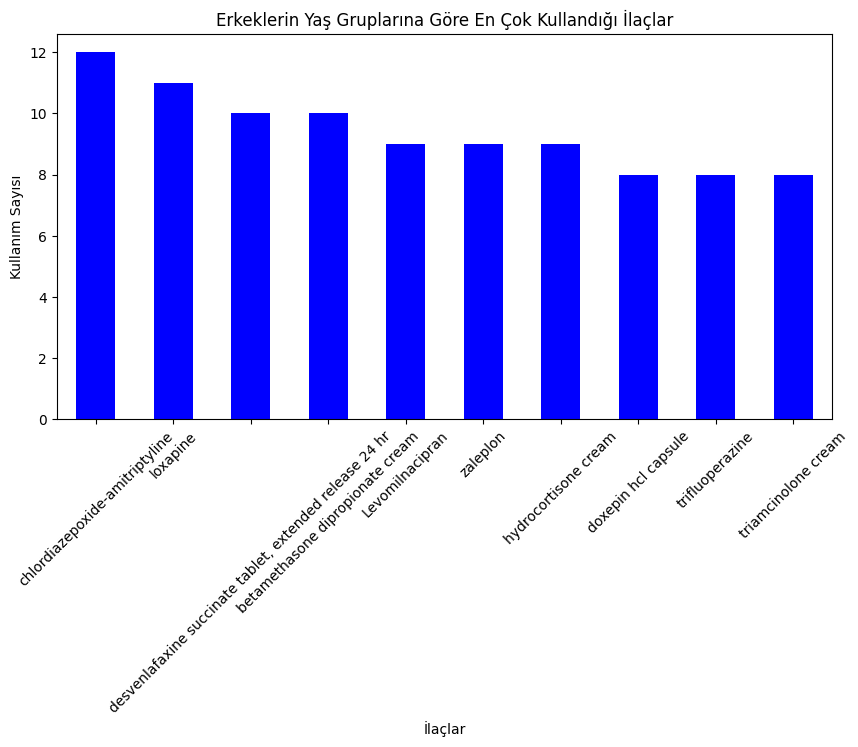

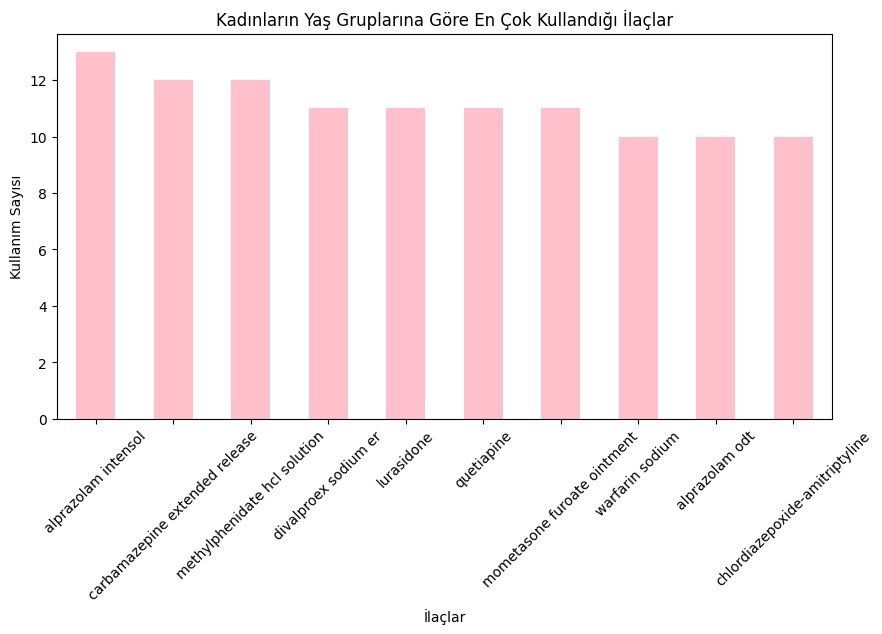

In [554]:
# Yaş gruplarını tanımlama
df_cleaned['Yas_Grubu'] = pd.cut(df_cleaned['Yas'], bins=[0, 18, 30, 45, 60, 100], labels=['0-18', '19-30', '31-45', '46-60', '60+'])

# Cinsiyet ve yaş grubuna göre ilaç kullanımı gruplama
ilac_kullanimi_cinsiyet_yas = df_cleaned.groupby(['Cinsiyet', 'Yas_Grubu', 'Ilac_Adi']).size().unstack(fill_value=0)

# Erkekler ve kadınlar için her yaş grubundaki en çok kullanılan ilaçlar
erkek_yas_ilac = ilac_kullanimi_cinsiyet_yas.loc[1].sum().sort_values(ascending=False).head(10)  # Erkekler
kadın_yas_ilac = ilac_kullanimi_cinsiyet_yas.loc[2].sum().sort_values(ascending=False).head(10)  # Kadınlar

# Görselleştirme: Erkeklerin yaş gruplarına göre en çok kullandığı ilaçlar
plt.figure(figsize=(10, 5))
erkek_yas_ilac.plot(kind='bar', color='blue')
plt.title('Erkeklerin Yaş Gruplarına Göre En Çok Kullandığı İlaçlar')
plt.xlabel('İlaçlar')
plt.ylabel('Kullanım Sayısı')
plt.xticks(rotation=45)
plt.show()

# Görselleştirme: Kadınların yaş gruplarına göre en çok kullandığı ilaçlar
plt.figure(figsize=(10, 5))
kadın_yas_ilac.plot(kind='bar', color='pink')
plt.title('Kadınların Yaş Gruplarına Göre En Çok Kullandığı İlaçlar')
plt.xlabel('İlaçlar')
plt.ylabel('Kullanım Sayısı')
plt.xticks(rotation=45)
plt.show()


In [555]:
# Checking the unique values in the 'Uyruk' column
unique_uyruk = df_cleaned['Uyruk'].unique()

# Displaying the unique values in 'Uyruk'
unique_uyruk


array(['Turkiye'], dtype=object)

In [556]:
# Dropping the 'Uyruk' column as it contains only 'Türkiye'
df_cleaned = df_cleaned.drop(columns=['Uyruk'])


In [557]:
# Converting 'Ilac_Baslangic_Tarihi' and 'Ilac_Bitis_Tarihi' to datetime format
df_cleaned['Ilac_Baslangic_Tarihi'] = pd.to_datetime(df_cleaned['Ilac_Baslangic_Tarihi'], errors='coerce')
df_cleaned['Ilac_Bitis_Tarihi'] = pd.to_datetime(df_cleaned['Ilac_Bitis_Tarihi'], errors='coerce')

# Calculating the duration of medication usage in days
df_cleaned['Ilac_Kullanim_Suresi'] = (df_cleaned['Ilac_Bitis_Tarihi'] - df_cleaned['Ilac_Baslangic_Tarihi']).dt.days

# Dropping the original 'Ilac_Baslangic_Tarihi' and 'Ilac_Bitis_Tarihi' columns
df_cleaned = df_cleaned.drop(columns=['Ilac_Baslangic_Tarihi', 'Ilac_Bitis_Tarihi'])



In [558]:
# Checking the unique values in the 'Yan_Etki' column
unique_yan_etki = df_cleaned['Yan_Etki'].unique()

# Displaying the unique values in 'Yan_Etki'
unique_yan_etki

array(['Kabizlik', 'Yorgunluk', 'Carpinti', 'Sinirlilik',
       'Agizda Farkli Bir Tat', 'Deride Morarma', 'Bas Agrisi',
       'Gormede Bulaniklik', 'Gucsuzluk', 'Az Uyuma', 'Huzursuzluk',
       'Mide Bulantisi', 'Kas Agrisi', 'Istah Artisi', 'Terleme',
       'Karin Agrisi', 'Tansiyon Yukselme', 'Gec Bosalma', 'Ishal',
       'Bulanti', 'Tansiyon Dusuklugu', 'Uykululuk Hali'], dtype=object)

In [559]:
# Defining numeric mapping for side effect severity
side_effects_mapping = {
    'Mild': 0,
    'Moderate': 1,
    'Severe': 2
}

# Function to classify and map side effects based on the severity
def classify_and_map_side_effect(value):
    value = value.lower()
    for severity, effects in side_effects_classification.items():
        if value in effects:
            return side_effects_mapping[severity]
    return None  # If no matching side effect is found

# Applying the classification and mapping function to the 'Yan_Etki' column
df_cleaned['Yan_Etki_Mapped'] = df_cleaned['Yan_Etki'].apply(classify_and_map_side_effect)

# Displaying the first few rows of the dataframe to confirm the changes
df_cleaned[['Yan_Etki', 'Yan_Etki_Mapped']].head()


,Yan_Etki,Yan_Etki_Mapped
0,Kabizlik,0
1,Yorgunluk,0
2,Carpinti,1
3,Sinirlilik,1
4,Agizda Farkli Bir Tat,0


In [560]:
df_cleaned

,Cinsiyet,Il,Ilac_Adi,Yan_Etki,Yan_Etki_Bildirim_Tarihi,Alerjilerim,Kronik Hastaliklarim,Baba Kronik Hastaliklari,Anne Kronik Hastaliklari,Kiz Kardes Kronik Hastaliklari,...,Alerjilerim_Mapped,Baba Kronik Hastaliklari_Mapped,Anne Kronik Hastaliklari_Mapped,Kiz Kardes Kronik Hastaliklari_Mapped,Erkek Kardes Kronik Hastaliklari_Mapped,Ilac_Adi_Normalized,Yas,Yas_Grubu,Ilac_Kullanim_Suresi,Yan_Etki_Mapped
0,1.0,Canakkale,trifluoperazine,Kabizlik,2022-02-19 18:28:43,Food Allergy,Heart Disease,Heart Disease,Respiratory Disease,Heart Disease,...,2,1,3,1,6,trifluoperazine,64,60+,54,0
1,1.0,Trabzon,fluphenazine hcl,Yorgunluk,2022-02-03 20:48:17,Respiratory Allergy,Other,Thyroid Disease,Heart Disease,Other Disease,...,1,8,1,9,2,fluphenazine hcl,85,60+,58,0
2,2.0,Canakkale,warfarin sodium,Carpinti,2022-02-04 05:29:20,Food Allergy,Heart Disease,Diabetes,Diabetes,Diabetes,...,2,2,2,2,9,warfarin sodium,48,46-60,60,1
3,1.0,Adana,valproic acid,Sinirlilik,2022-02-08 01:01:21,Other Allergy,Diabetes,Heart Disease,None,Respiratory Disease,...,3,1,0,3,1,valproic acid,47,46-60,67,1
4,2.0,Izmir,carbamazepine extended release,Agizda Farkli Bir Tat,2022-02-12 05:33:06,None,Heart Disease,Heart Disease,Bone Disease,Diabetes,...,0,1,6,2,1,carbamazepine extended release,48,46-60,52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2352,0.0,NaN,"desoximetasone spray, non-aerosol",Ishal,2022-02-12 19:13:43,Food Allergy,Other,Other Disease,Respiratory Disease,Other Disease,...,2,9,3,9,3,"desoximetasone spray, non-aerosol",67,60+,50,0
2353,2.0,Mersin,olanzapine-fluoxetine,Agizda Farkli Bir Tat,2022-02-19 17:39:48,Food Allergy,Other,Heart Disease,Respiratory Disease,Respiratory Disease,...,2,1,3,3,2,olanzapine-fluoxetine,20,19-30,62,0
2354,2.0,Mersin,trazodone,Yorgunluk,2022-02-03 20:48:17,Food Allergy,Respiratory Disease,Alzheimer,None,Diabetes,...,2,5,0,2,1,trazodone,73,60+,69,0
2355,1.0,Kayseri,duloxetine hydrochloride,Carpinti,2022-02-04 05:29:20,Food Allergy,Other,None,Heart Disease,Respiratory Disease,...,2,0,1,3,3,duloxetine hydrochloride,44,31-45,65,1


In [561]:
# Dropping the 'Yan_Etki_Bildirim_Tarihi' column
df_cleaned = df_cleaned.drop(columns=['Yan_Etki_Bildirim_Tarihi'])

# Displaying the first few rows to confirm the changes
df_cleaned.head()


,Cinsiyet,Il,Ilac_Adi,Yan_Etki,Alerjilerim,Kronik Hastaliklarim,Baba Kronik Hastaliklari,Anne Kronik Hastaliklari,Kiz Kardes Kronik Hastaliklari,Erkek Kardes Kronik Hastaliklari,...,Alerjilerim_Mapped,Baba Kronik Hastaliklari_Mapped,Anne Kronik Hastaliklari_Mapped,Kiz Kardes Kronik Hastaliklari_Mapped,Erkek Kardes Kronik Hastaliklari_Mapped,Ilac_Adi_Normalized,Yas,Yas_Grubu,Ilac_Kullanim_Suresi,Yan_Etki_Mapped
0,1.0,Canakkale,trifluoperazine,Kabizlik,Food Allergy,Heart Disease,Heart Disease,Respiratory Disease,Heart Disease,Bone Disease,...,2,1,3,1,6,trifluoperazine,64,60+,54,0
1,1.0,Trabzon,fluphenazine hcl,Yorgunluk,Respiratory Allergy,Other,Thyroid Disease,Heart Disease,Other Disease,Diabetes,...,1,8,1,9,2,fluphenazine hcl,85,60+,58,0
2,2.0,Canakkale,warfarin sodium,Carpinti,Food Allergy,Heart Disease,Diabetes,Diabetes,Diabetes,Other Disease,...,2,2,2,2,9,warfarin sodium,48,46-60,60,1
3,1.0,Adana,valproic acid,Sinirlilik,Other Allergy,Diabetes,Heart Disease,None,Respiratory Disease,Heart Disease,...,3,1,0,3,1,valproic acid,47,46-60,67,1
4,2.0,Izmir,carbamazepine extended release,Agizda Farkli Bir Tat,None,Heart Disease,Heart Disease,Bone Disease,Diabetes,Heart Disease,...,0,1,6,2,1,carbamazepine extended release,48,46-60,52,0


In [562]:
# Converting height from cm to meters
df_cleaned['Boy_metre'] = df_cleaned['Boy'] / 100

# Calculating BMI
df_cleaned['BMI'] = df_cleaned['Kilo'] / (df_cleaned['Boy_metre'] ** 2)

# Displaying the first few rows to confirm the BMI calculation
df_cleaned[['Kilo', 'Boy', 'Boy_metre', 'BMI']].head()


,Kilo,Boy,Boy_metre,BMI
0,103.0,191.0,1.91,28.233875
1,81.0,181.0,1.81,24.724520
2,93.0,158.0,1.58,37.253645
3,96.2,165.0,1.65,35.335170
4,99.0,172.0,1.72,33.464035


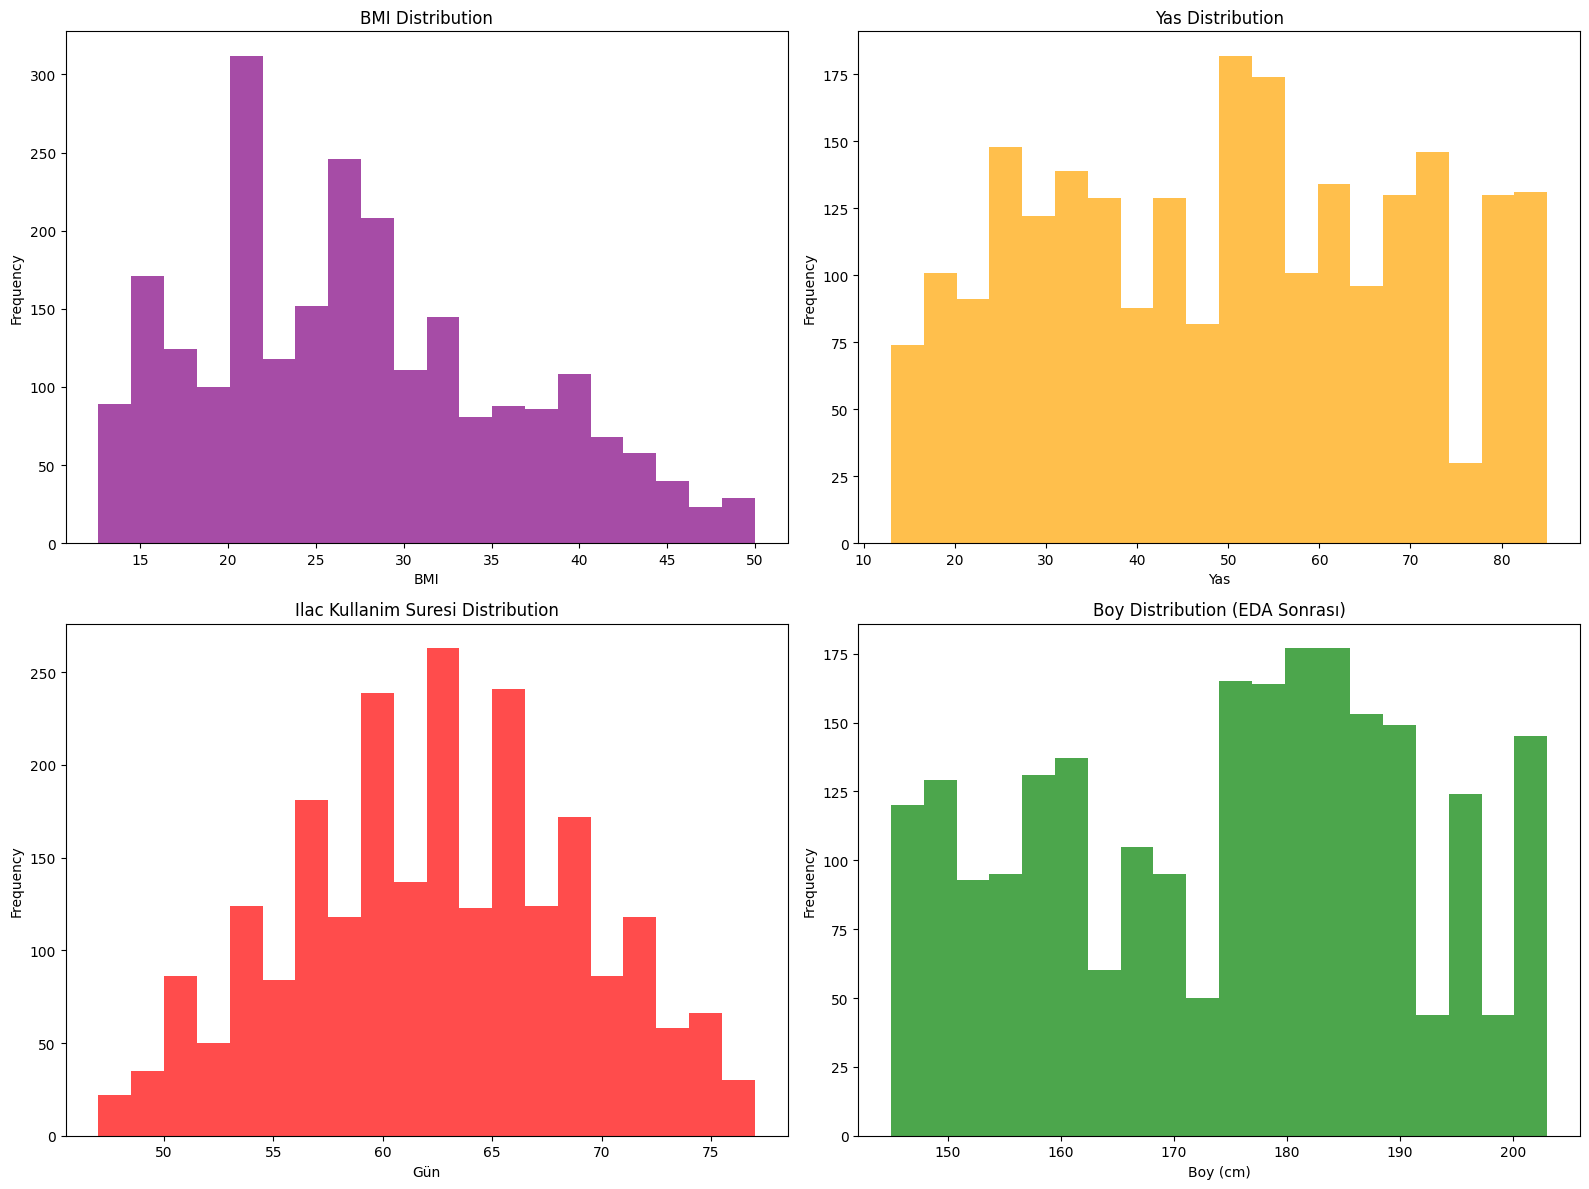

In [563]:
# Sayısal sütunlar için histogramlar
plt.figure(figsize=(16, 12))

# BMI distribution
plt.subplot(2, 2, 1)
plt.hist(df_cleaned['BMI'], bins=20, color='purple', alpha=0.7)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')

# Yas distribution
plt.subplot(2, 2, 2)
plt.hist(df_cleaned['Yas'], bins=20, color='orange', alpha=0.7)
plt.title('Yas Distribution')
plt.xlabel('Yas')
plt.ylabel('Frequency')

# Ilac_Kullanim_Suresi distribution
plt.subplot(2, 2, 3)
plt.hist(df_cleaned['Ilac_Kullanim_Suresi'], bins=20, color='red', alpha=0.7)
plt.title('Ilac Kullanim Suresi Distribution')
plt.xlabel('Gün')
plt.ylabel('Frequency')

# Boy distribution (daha önce yaptığımız gibi)
plt.subplot(2, 2, 4)
plt.hist(df_cleaned['Boy'], bins=20, color='green', alpha=0.7)
plt.title('Boy Distribution (EDA Sonrası)')
plt.xlabel('Boy (cm)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


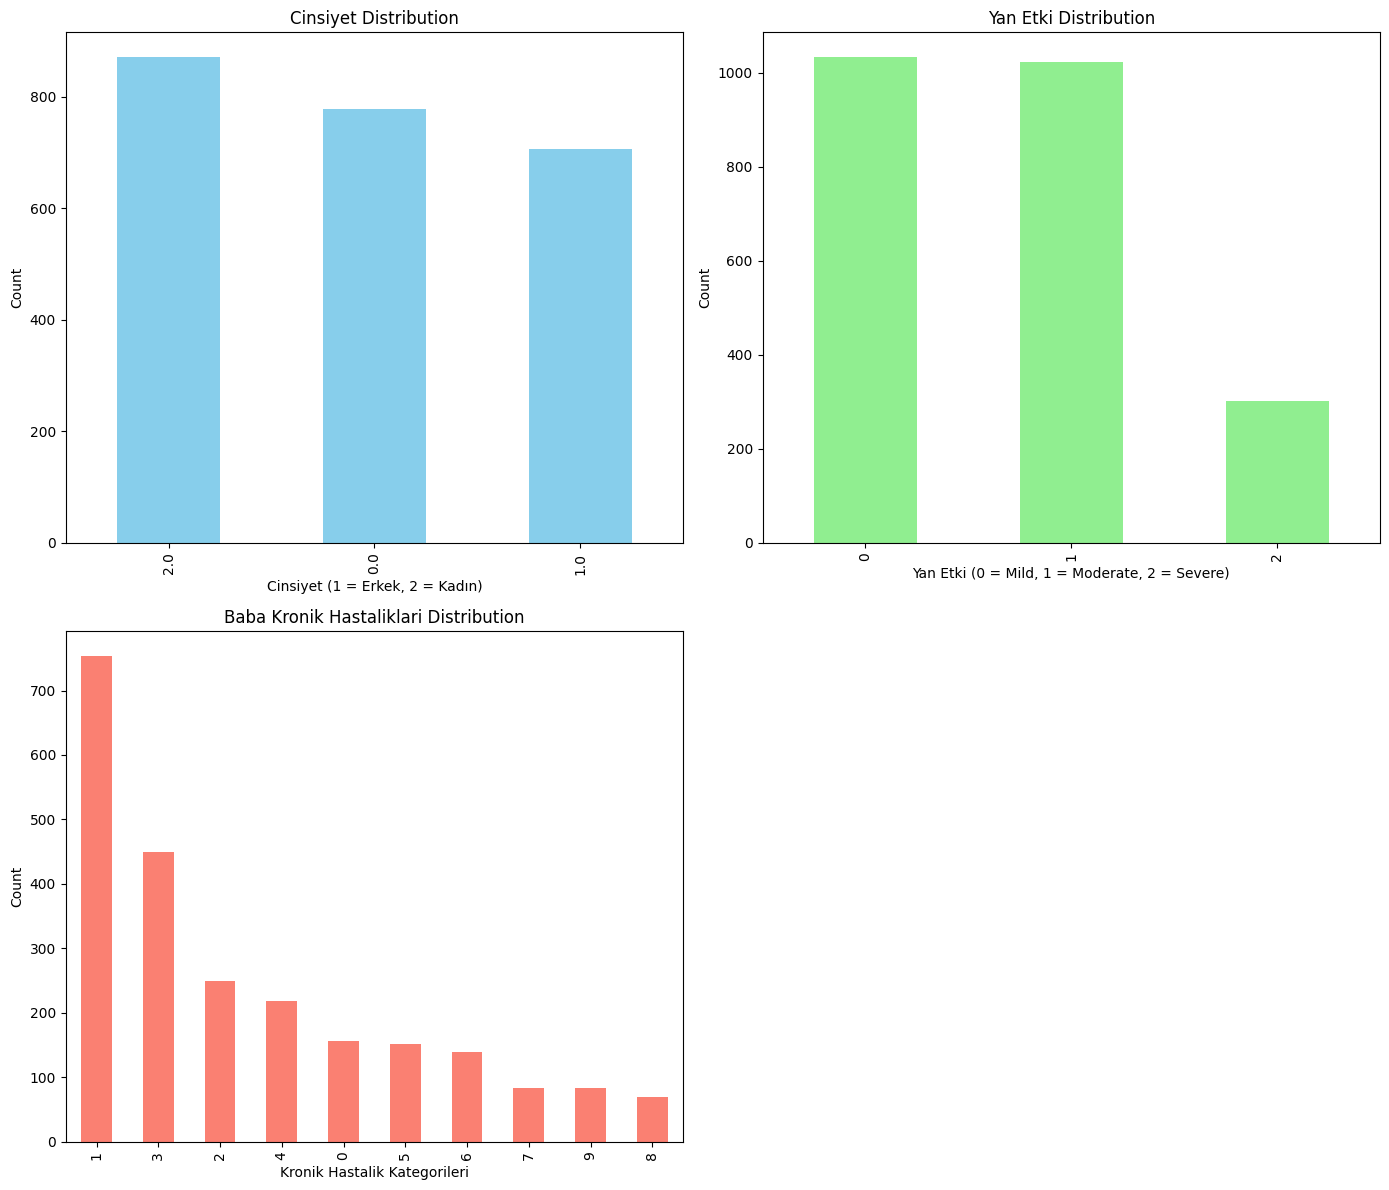

In [564]:
# Cinsiyet, Yan_Etki ve Kronik Hastaliklar gibi kategorik sütunlar için bar grafikleri
plt.figure(figsize=(14, 12))

# Cinsiyet dağılımı
plt.subplot(2, 2, 1)
df_cleaned['Cinsiyet'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Cinsiyet Distribution')
plt.xlabel('Cinsiyet (1 = Erkek, 2 = Kadın)')
plt.ylabel('Count')

# Yan_Etki dağılımı
plt.subplot(2, 2, 2)
df_cleaned['Yan_Etki_Mapped'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Yan Etki Distribution')
plt.xlabel('Yan Etki (0 = Mild, 1 = Moderate, 2 = Severe)')
plt.ylabel('Count')

# Kronik Hastaliklar dağılımı
plt.subplot(2, 2, 3)
df_cleaned['Baba Kronik Hastaliklari_Mapped'].value_counts().plot(kind='bar', color='salmon')
plt.title('Baba Kronik Hastaliklari Distribution')
plt.xlabel('Kronik Hastalik Kategorileri')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


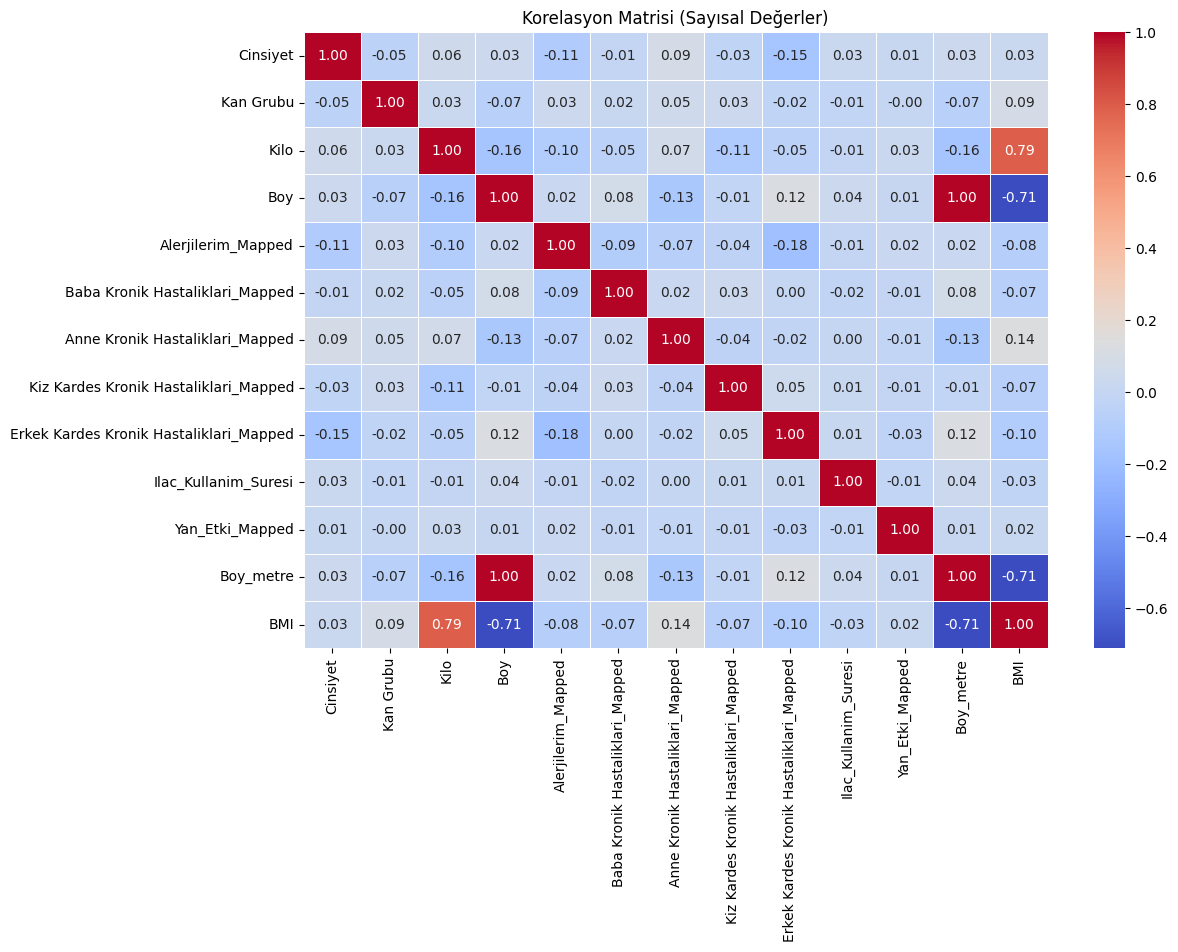

In [565]:
numeric_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Sayısal sütunlar arasındaki korelasyonu hesaplama
corr_matrix = df_cleaned[numeric_columns].corr()

# Korelasyon matrisini görselleştirme (heatmap)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Korelasyon Matrisi (Sayısal Değerler)')
plt.show()

In [566]:
df_cleaned.columns


Index(['Cinsiyet', 'Il', 'Ilac_Adi', 'Yan_Etki', 'Alerjilerim',
       'Kronik Hastaliklarim', 'Baba Kronik Hastaliklari',
       'Anne Kronik Hastaliklari', 'Kiz Kardes Kronik Hastaliklari',
       'Erkek Kardes Kronik Hastaliklari', 'Kan Grubu', 'Kilo', 'Boy',
       'Bolge_Akdeniz', 'Bolge_Bilinmeyen', 'Bolge_Doğu Anadolu', 'Bolge_Ege',
       'Bolge_Karadeniz', 'Bolge_Marmara', 'Bolge_İç Anadolu',
       'Alerjilerim_Mapped', 'Baba Kronik Hastaliklari_Mapped',
       'Anne Kronik Hastaliklari_Mapped',
       'Kiz Kardes Kronik Hastaliklari_Mapped',
       'Erkek Kardes Kronik Hastaliklari_Mapped', 'Ilac_Adi_Normalized', 'Yas',
       'Yas_Grubu', 'Ilac_Kullanim_Suresi', 'Yan_Etki_Mapped', 'Boy_metre',
       'BMI'],
      dtype='object')

In [568]:
df_cleaned.isnull().sum()

,0
Cinsiyet,0
Il,227
Ilac_Adi,0
Yan_Etki,0
Alerjilerim,0
Kronik Hastaliklarim,0
Baba Kronik Hastaliklari,0
Anne Kronik Hastaliklari,0
Kiz Kardes Kronik Hastaliklari,0
Erkek Kardes Kronik Hastaliklari,0


In [569]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Kategorik ve sayısal sütunlar
categorical_features = ['Il', 'Kan Grubu']  # Kategorik veriler
numerical_features = ['Kilo', 'Boy', 'BMI']  # Sayısal veriler

# Sayısal veri pipeline: Eksik değer doldurma ve ölçekleme
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Eksik değerleri medyan ile doldurma
    ('scaler', StandardScaler())  # Ölçekleme
])

# Kategorik veri pipeline: Eksik değer doldurma ve One-Hot Encoding
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # En sık görülen değerle eksik veri doldurma
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-Hot Encoding
])

# Preprocessor: Hem sayısal hem de kategorik sütunları aynı anda işleyebilmek için
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),  # Sayısal veriler için pipeline
        ('cat', categorical_pipeline, categorical_features)  # Kategorik veriler için pipeline
    ]
)

# Pipeline'ı uygulama
df_transformed = preprocessor.fit_transform(df_cleaned)


In [570]:
df_cleaned.columns


Index(['Cinsiyet', 'Il', 'Ilac_Adi', 'Yan_Etki', 'Alerjilerim',
       'Kronik Hastaliklarim', 'Baba Kronik Hastaliklari',
       'Anne Kronik Hastaliklari', 'Kiz Kardes Kronik Hastaliklari',
       'Erkek Kardes Kronik Hastaliklari', 'Kan Grubu', 'Kilo', 'Boy',
       'Bolge_Akdeniz', 'Bolge_Bilinmeyen', 'Bolge_Doğu Anadolu', 'Bolge_Ege',
       'Bolge_Karadeniz', 'Bolge_Marmara', 'Bolge_İç Anadolu',
       'Alerjilerim_Mapped', 'Baba Kronik Hastaliklari_Mapped',
       'Anne Kronik Hastaliklari_Mapped',
       'Kiz Kardes Kronik Hastaliklari_Mapped',
       'Erkek Kardes Kronik Hastaliklari_Mapped', 'Ilac_Adi_Normalized', 'Yas',
       'Yas_Grubu', 'Ilac_Kullanim_Suresi', 'Yan_Etki_Mapped', 'Boy_metre',
       'BMI'],
      dtype='object')

In [571]:
# Sütunları veri setinden tamamen kaldırma
df_cleaned.drop(columns=['Il', 'Ilac_Adi', 'Yan_Etki', 'Alerjilerim',
                         'Kronik Hastaliklarim', 'Baba Kronik Hastaliklari',
                         'Anne Kronik Hastaliklari', 'Kiz Kardes Kronik Hastaliklari',
                         'Erkek Kardes Kronik Hastaliklari', 'Kan Grubu', 'Kilo', 'Boy','Ilac_Adi_Normalized'], inplace=True)


df_cleaned.head()


,Cinsiyet,Bolge_Akdeniz,Bolge_Bilinmeyen,Bolge_Doğu Anadolu,Bolge_Ege,Bolge_Karadeniz,Bolge_Marmara,Bolge_İç Anadolu,Alerjilerim_Mapped,Baba Kronik Hastaliklari_Mapped,Anne Kronik Hastaliklari_Mapped,Kiz Kardes Kronik Hastaliklari_Mapped,Erkek Kardes Kronik Hastaliklari_Mapped,Yas,Yas_Grubu,Ilac_Kullanim_Suresi,Yan_Etki_Mapped,Boy_metre,BMI
0,1.0,False,False,False,False,False,True,False,2,1,3,1,6,64,60+,54,0,1.91,28.233875
1,1.0,False,False,False,False,True,False,False,1,8,1,9,2,85,60+,58,0,1.81,24.724520
2,2.0,False,False,False,False,False,True,False,2,2,2,2,9,48,46-60,60,1,1.58,37.253645
3,1.0,True,False,False,False,False,False,False,3,1,0,3,1,47,46-60,67,1,1.65,35.335170
4,2.0,False,False,False,True,False,False,False,0,1,6,2,1,48,46-60,52,0,1.72,33.464035


In [572]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Yaş gruplarını tanımlama
df_cleaned['Yas_Grubu'] = pd.cut(df_cleaned['Yas'],
                                 bins=[0, 18, 30, 45, 60, 100],
                                 labels=['0-18', '19-30', '31-45', '46-60', '60+'])

# One-Hot Encoding uygulama
encoder = OneHotEncoder(sparse=False)
yas_grubu_encoded = encoder.fit_transform(df_cleaned[['Yas_Grubu']])

# Yeni sütun isimlerini belirleme
yas_grubu_encoded_columns = encoder.get_feature_names_out(['Yas_Grubu'])

# One-Hot Encoded sütunları dataframe'e ekleme
df_yas_grubu_encoded = pd.DataFrame(yas_grubu_encoded, columns=yas_grubu_encoded_columns)

# Yeni sütunları orijinal dataframe'e ekleme
df_cleaned = pd.concat([df_cleaned, df_yas_grubu_encoded], axis=1)

# Sonucu kontrol etme
df_cleaned.head()


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Cinsiyet,Bolge_Akdeniz,Bolge_Bilinmeyen,Bolge_Doğu Anadolu,Bolge_Ege,Bolge_Karadeniz,Bolge_Marmara,Bolge_İç Anadolu,Alerjilerim_Mapped,Baba Kronik Hastaliklari_Mapped,...,Yas_Grubu,Ilac_Kullanim_Suresi,Yan_Etki_Mapped,Boy_metre,BMI,Yas_Grubu_0-18,Yas_Grubu_19-30,Yas_Grubu_31-45,Yas_Grubu_46-60,Yas_Grubu_60+
0,1.0,False,False,False,False,False,True,False,2,1,...,60+,54,0,1.91,28.233875,0.0,0.0,0.0,0.0,1.0
1,1.0,False,False,False,False,True,False,False,1,8,...,60+,58,0,1.81,24.724520,0.0,0.0,0.0,0.0,1.0
2,2.0,False,False,False,False,False,True,False,2,2,...,46-60,60,1,1.58,37.253645,0.0,0.0,0.0,1.0,0.0
3,1.0,True,False,False,False,False,False,False,3,1,...,46-60,67,1,1.65,35.335170,0.0,0.0,0.0,1.0,0.0
4,2.0,False,False,False,True,False,False,False,0,1,...,46-60,52,0,1.72,33.464035,0.0,0.0,0.0,1.0,0.0


In [573]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# BMI değerlerine göre gruplandırma
def bmi_classification(bmi):
    if bmi < 18.5:
        return 'Zayıf'
    elif 18.5 <= bmi < 25:
        return 'Normal Kilolu'
    elif 25 <= bmi < 30:
        return 'Kilolu'
    else:
        return 'Obez'

# BMI sınıflarını oluşturma
df_cleaned['BMI_Grubu'] = df_cleaned['BMI'].apply(bmi_classification)

# One-Hot Encoding uygulama
encoder = OneHotEncoder(sparse=False)
bmi_grubu_encoded = encoder.fit_transform(df_cleaned[['BMI_Grubu']])

# Yeni sütun isimlerini belirleme
bmi_grubu_encoded_columns = encoder.get_feature_names_out(['BMI_Grubu'])

# One-Hot Encoded sütunları dataframe'e ekleme
df_bmi_grubu_encoded = pd.DataFrame(bmi_grubu_encoded, columns=bmi_grubu_encoded_columns)

# Yeni sütunları orijinal dataframe'e ekleme
df_cleaned = pd.concat([df_cleaned, df_bmi_grubu_encoded], axis=1)

# Sonucu kontrol etme
df_cleaned.head()


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Cinsiyet,Bolge_Akdeniz,Bolge_Bilinmeyen,Bolge_Doğu Anadolu,Bolge_Ege,Bolge_Karadeniz,Bolge_Marmara,Bolge_İç Anadolu,Alerjilerim_Mapped,Baba Kronik Hastaliklari_Mapped,...,Yas_Grubu_0-18,Yas_Grubu_19-30,Yas_Grubu_31-45,Yas_Grubu_46-60,Yas_Grubu_60+,BMI_Grubu,BMI_Grubu_Kilolu,BMI_Grubu_Normal Kilolu,BMI_Grubu_Obez,BMI_Grubu_Zayıf
0,1.0,False,False,False,False,False,True,False,2,1,...,0.0,0.0,0.0,0.0,1.0,Kilolu,1.0,0.0,0.0,0.0
1,1.0,False,False,False,False,True,False,False,1,8,...,0.0,0.0,0.0,0.0,1.0,Normal Kilolu,0.0,1.0,0.0,0.0
2,2.0,False,False,False,False,False,True,False,2,2,...,0.0,0.0,0.0,1.0,0.0,Obez,0.0,0.0,1.0,0.0
3,1.0,True,False,False,False,False,False,False,3,1,...,0.0,0.0,0.0,1.0,0.0,Obez,0.0,0.0,1.0,0.0
4,2.0,False,False,False,True,False,False,False,0,1,...,0.0,0.0,0.0,1.0,0.0,Obez,0.0,0.0,1.0,0.0
